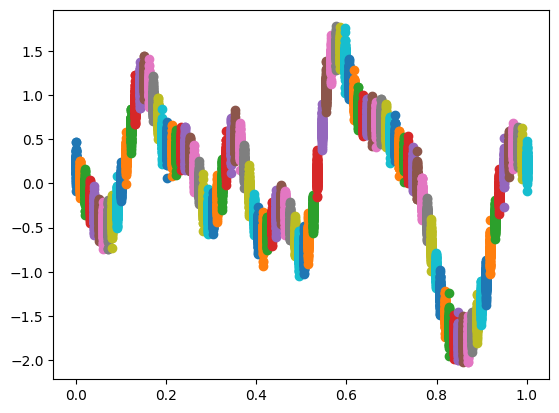

CUDA Available: False


In [8]:
from data_utils import generate_data_from_function
from experiment_utils import generate_simulation_data
import numpy as np
import matplotlib.pyplot as plt
import torch

T, X = generate_data_from_function(generate_simulation_data(), num_samples=500, sparsity=0.3)
time_values = np.linspace(0, 1, T.shape[1])

plt.plot(T, X, "o")
plt.show()

print(f"CUDA Available: {torch.cuda.is_available()}")  # Should return True

In [9]:
from neuralint import NeuralInt
from data_utils import get_dataloaders
from model_utils import load_model, train

dataloaders = get_dataloaders(T, X)
model = NeuralInt(input_dim=X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4, weight_decay=1e-8)
epoch, loss = load_model(model, optimizer=optimizer)
train(model, optimizer, dataloaders["train"], dataloaders["validate"], num_epochs=500, starting_epoch = epoch, best_val_loss = loss)

c:\Users\Sri Pranav Kunda\Documents\Projects\NeuralInt\.venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Starting training at epoch 1/500, Validation Loss: inf
Epoch 1/500, Training Loss: 0.3429108
Checkpoint saved: checkpoints\checkpoint_epoch_1.pth
Epoch 1/500, Validation Loss: 0.1005556
Best model saved: checkpoints\best_model.pth
Epoch 2/500, Training Loss: 0.1111948
Epoch 2/500, Validation Loss: 0.0701146
Best model saved: checkpoints\best_model.pth
Epoch 3/500, Training Loss: 0.0915376
Epoch 3/500, Validation Loss: 0.0715856
Epoch 4/500, Training Loss: 0.0821920
Epoch 4/500, Validation Loss: 0.0679082
Best model saved: checkpoints\best_model.pth
Epoch 5/500, Training Loss: 0.0806330
Epoch 5/500, Validation Loss: 0.0643141
Best model saved: checkpoints\best_model.pth
Epoch 6/500, Training Loss: 0.0779101
Epoch 6/500, Validation Loss: 0.0634589
Best model saved: checkpoints\best_model.pth
Epoch 7/500, Training Loss: 0.0771441
Epoch 7/500, Validation Loss: 0.0629143
Best model saved: checkpoints\best_model.pth
Epoch 8/500, Training Loss: 0.0750138
Epoch 8/500, Validation Loss: 0.062462

KeyboardInterrupt: 

In [23]:
from neuralint import get_imputation_from_checkpoint
import matplotlib.pyplot as plt

subset = dataloaders["test"].dataset
T_test, X_test, _ = subset.dataset[subset.indices]

X_imputed_transformer, X_imputed_neuralint, integration_fn = get_imputation_from_checkpoint(T_test, X_test)

c:\Users\Sri Pranav Kunda\Documents\Projects\NeuralInt\.venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Loaded model checkpoint with epoch: 264, and validation loss: 0.0015226267278194427


In [24]:
X_imputed_mean_neuralint = torch.mean(X_imputed_neuralint, axis=0).detach().numpy()
X_imputed_mean_transformer = torch.mean(X_imputed_transformer, axis=0).detach().numpy()

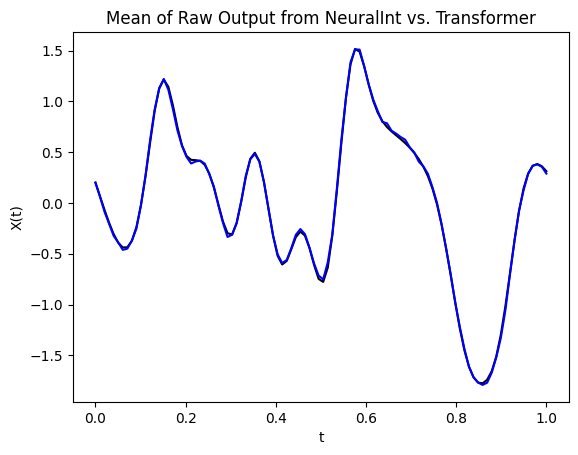

In [25]:
plt.plot(time_values, X_imputed_mean_neuralint, color="black", label="NeuralInt")
plt.plot(time_values, X_imputed_mean_transformer, color="blue", label="Transformer")
plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('Mean of Raw Output from NeuralInt vs. Transformer')
plt.show()

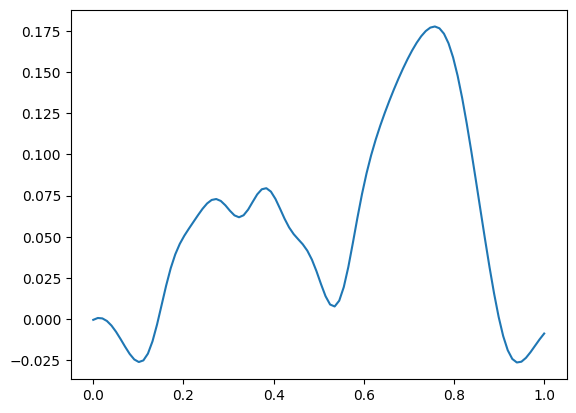

In [27]:
mean_integration_function = torch.mean(integration_fn, axis=0)
plt.plot(time_values, mean_integration_function.detach().numpy())
plt.show()